# Lead Scoring Case Study

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

### Loading Data

In [2]:
# Loading data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

### Cleaning Data

#### Missing Values

In [4]:
df_missing = df.isnull().mean() * 100
df_missing[df_missing > 0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

Large number of missing optional fields have been marked as `Select`. It also needs to be handled.

In [5]:
df = df.replace({'Select': np.nan})

In [6]:
df_missing = df.isnull().mean() * 100
df_missing[df_missing > 0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

After consulting data dictionary, the columns having more than 40% missing values don't seem important for analysis. So, I am dropping them.

In [7]:
df.drop(df_missing[df_missing > 40].index, axis=1, inplace=True)

In [8]:
df.shape

(9240, 30)

In [9]:
df_missing = df.isnull().mean() * 100
df_missing[df_missing > 0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
dtype: float64

Removing rows with small percentage of missing value.

In [10]:
df = df[df['Lead Source'].notnull() & df['TotalVisits'].notnull() & df['Page Views Per Visit'].notnull() & df['Last Activity']]

In [11]:
df_missing = df.isnull().mean() * 100
df_missing[df_missing > 0]

Country                                          25.303064
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Tags                                             36.665197
City                                             39.398281
dtype: float64

Imputing missing values.

In [12]:
df['Country'].value_counts(normalize=True) * 100

India                   95.765713
United States            1.017999
United Arab Emirates     0.781942
Singapore                0.354087
Saudi Arabia             0.309826
United Kingdom           0.221304
Australia                0.191797
Qatar                    0.147536
Hong Kong                0.103275
Bahrain                  0.103275
Oman                     0.088522
France                   0.088522
unknown                  0.073768
South Africa             0.059014
Nigeria                  0.059014
Germany                  0.059014
Kuwait                   0.059014
Canada                   0.059014
Sweden                   0.044261
China                    0.029507
Asia/Pacific Region      0.029507
Uganda                   0.029507
Bangladesh               0.029507
Italy                    0.029507
Belgium                  0.029507
Netherlands              0.029507
Ghana                    0.029507
Philippines              0.029507
Russia                   0.014754
Switzerland   

The missing value is most likely `India`.

In [13]:
# Imputing missing value with India
df['Country'] = df['Country'].fillna('India')

In [14]:
df['Specialization'].value_counts(normalize=True) * 100

Finance Management                   16.557320
Human Resource Management            14.450967
Marketing Management                 14.209254
Operations Management                 8.615331
Business Administration               6.888812
IT Projects Management                6.319061
Supply Chain Management               5.973757
Banking, Investment And Insurance     5.783840
Travel and Tourism                    3.487569
Media and Advertising                 3.487569
International Business                3.038674
Healthcare Management                 2.693370
E-COMMERCE                            1.916436
Hospitality Management                1.916436
Retail Management                     1.726519
Rural and Agribusiness                1.260359
E-Business                            0.984116
Services Excellence                   0.690608
Name: Specialization, dtype: float64

Creating new category for missing value as imputation with mode will create bias against comparable category at rank 2 and 3.

In [15]:
# Imputing missing value with a new category
df['Specialization'] = df['Specialization'].fillna('Others')

In [16]:
df['What is your current occupation'].value_counts(normalize=True) * 100

Unemployed              85.682992
Working Professional    10.593021
Student                  3.223283
Other                    0.234705
Housewife                0.140823
Businessman              0.125176
Name: What is your current occupation, dtype: float64

Missing values are most likely `Unemployed`.

In [17]:
# Imputing missing value with the mode
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unemployed')

In [18]:
df['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.968613
Flexibility & Convenience     0.015694
Other                         0.015694
Name: What matters most to you in choosing a course, dtype: float64

In [19]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The missing values are most likely `Better Career Prospects`, but imputing missing values with mode will add no value as the feature is already useless because other categories don't have enough frequency to compete with mode. So, this feature can be dropped.

In [20]:
df['Tags'].value_counts(normalize=True) * 100

Will revert after reading the email                  35.079172
Ringing                                              20.654254
Interested in other courses                           8.856795
Already a student                                     8.091178
Closed by Horizzon                                    5.237515
switched off                                          4.176092
Busy                                                  3.219071
Lost to EINS                                          2.992866
Not doing further education                           2.523056
Interested  in full time MBA                          2.018444
Graduation in progress                                1.931442
invalid number                                        1.444232
Diploma holder (Not Eligible)                         1.096224
wrong number given                                    0.817818
opp hangup                                            0.574213
number not provided                                   0

The missing values are most likely `Will revert after reading the email`.

In [21]:
# Imputing missing values with the mode
df['Tags'] = df['Tags'].fillna('Will revert after reading the email')

In [22]:
df['City'].value_counts(normalize=True) * 100

Mumbai                         57.774141
Thane & Outskirts              13.547918
Other Cities                   12.365885
Other Cities of Maharashtra     8.110566
Other Metro Cities              6.855792
Tier II Cities                  1.345699
Name: City, dtype: float64

The missing values are most likely `Mumbai` if country is `India`. Otherwise, it can be `Other Cities`.

In [23]:
df['City'] = df['City'].fillna('Missing')
df['City'] = df.apply(lambda x: 'Mumbai' if ((x['Country'] == 'India') & (x['City'] == 'Missing')) else ('Other Cities' if (x['City'] == 'Missing') else x['City']), axis=1)

In [24]:
df['City'].value_counts(normalize=True) * 100

Mumbai                         73.749173
Thane & Outskirts               8.210271
Other Cities                    8.155169
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64

#### Duplicate Values

In [25]:
df.duplicated().sum()

0

In [26]:
# Check for duplicate in Prospect ID
df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [27]:
# Check for duplicate in Lead Number
df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

**Assessment:**  
`Prospect ID` and `Lead Number` can safely be dropped because DataFrame index makes them redundant.

#### Unnecessary Features

In [28]:
# Checking features with only one category
df_nunique = df.nunique()
df_nunique[df_nunique < 2]

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64

Based on Data Dictionary & inspection, following features are unnecessary:
- `Prospect ID` (DataFrame index already uniquely identifies a customer)
- `Lead Number` (DataFrame index already uniquely identifies a lead)
- `What matters most to you in choosing a course` (Massive data imbalance across categories)
- `Do Not Call` (Massive data imbalance across categories)
- `Search` (Massive data imbalance across categories)
- `Newspaper Article` (Massive data imbalance across categories)
- `X Education Forums` (Massive data imbalance across categories)
- `Newspaper` (Massive data imbalance across categories)
- `Digital Advertisement` (Massive data imbalance across categories)
- `Through Recommendations` (Massive data imbalance across categories)
- `Magazine` (Only one category)
- `Receive More Updates About Our Courses` (Only one category)
- `Update me on Supply Chain Content` (Only one category)
- `Get updates on DM Content` (Only one category)
- `I agree to pay the amount through cheque` (Only one category)
- `Last Notable Activity` (Redundant; `Last Activity` captures the same)

In [29]:
# Removing unnecessary features
df.drop(['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Last Notable Activity'], axis=1, inplace=True)
df.shape

(9074, 14)

### Univariate Analysis

In [30]:
# Helper functions for Numerical Univariate Analysis
def num_uni_box_analysis(var, friendly_name=None):
  if friendly_name is None:
    friendly_name = var
  ax = sns.boxplot(data=df, x=var)
  ax.set_xticks(list(df[var].quantile([0,0.25,0.5,0.75,0.95,1])))
  ax.set_xlabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Univariate Analysis', fontsize=20)
  ax.figure.set_size_inches(24,8)
  return ax

def num_uni_hist_analysis(var, friendly_name=None, bins=25):
  if friendly_name is None:
    friendly_name = var
  ax = sns.histplot(data=df ,x=var, stat='percent', bins=bins)
  ax.set_xlabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Histogram', fontsize=20)
  ax.figure.set_size_inches(24,8)
  return ax

In [31]:
# Helper functions for Numerical Segmented Univariate Analysis
def num_uni_box_seg_analysis(var, friendly_name=None):
  if friendly_name is None:
    friendly_name = var
  ax = sns.boxplot(data=df, x='Converted', y=var)
  ax.legend(['No', 'Yes'])
  ax.set_ylabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Univariate Analysis', fontsize=20)
  ax.figure.set_size_inches(24,8)
  return ax

def num_uni_hist_seg_analysis(var, friendly_name=None, bins=25):
  if friendly_name is None:
    friendly_name = var
  ax = sns.histplot(data=df ,x=var, hue='Converted', stat='percent', multiple='fill', bins=bins)
  ax.legend(['No', 'Yes'])
  ax.set_xlabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Histogram (Normalised)', fontsize=20)
  ax.figure.set_size_inches(24,8)
  return ax

In [32]:
# Helper function for Categorical Univariate Analysis
def cat_uni_analysis(col, friendly_name=None):
  if friendly_name is None:
    friendly_name = col
  tmp_df = df[col].value_counts(normalize=True).mul(100).rename('Percent').reset_index().rename(columns={'index': col})
  ax = sns.barplot(data=tmp_df, x=col, y='Percent')
  for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + (p.get_width()/2)
    txt_y = p.get_height()
    ax.annotate(txt, (txt_x, txt_y), size=11, ha='center', va='bottom')
  ax.set_title(f'{friendly_name} Univariate Analysis (Normalised)', fontsize=20)
  ax.set_xlabel(friendly_name)
  ax.figure.set_size_inches(16,8)
  return ax

In [33]:
# Helper function for Categorical Segmented Univariate Analysis
def cat_seg_analysis(col, friendly_name=None):
  if friendly_name is None:
    friendly_name = col
  tmp_df = df.groupby(col)['Converted'].value_counts(normalize=True).mul(100).rename('Percent').reset_index().replace(0,'No').replace(1,'Yes')
  ax = sns.barplot(data=tmp_df, x=col, y='Percent', hue='Converted')
  for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + (p.get_width()/2)
    txt_y = p.get_height()
    ax.annotate(txt, (txt_x, txt_y), size=11, ha='center', va='bottom')
  ax.set_title(f'{friendly_name} Segmented Univariate Analysis (Normalised)', fontsize=20)
  ax.set_xlabel(friendly_name)
  ax.figure.set_size_inches(16,8)
  return ax

#### Feature: 'Converted'

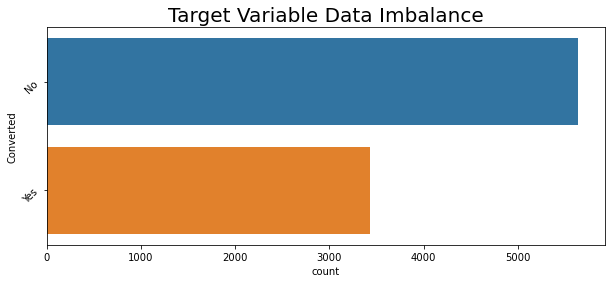

In [34]:
ax = sns.countplot(y=df['Converted'])
plt.yticks([0,1], ['No', 'Yes'], rotation=45)
ax.set_title('Target Variable Data Imbalance', fontsize=20)
ax.figure.set_size_inches(10,4)
plt.show()

**Assessment:**  
- `Converted` is a categorical variable which is also target variable for model training.
- Data imbalance isn't in the favour of the company.

#### Feature: 'Lead Origin'

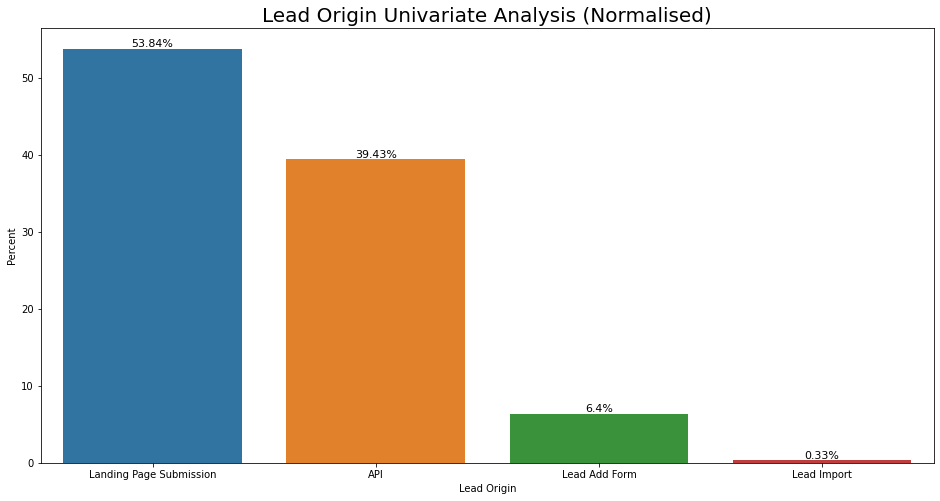

In [35]:
cat_uni_analysis('Lead Origin')
plt.show()

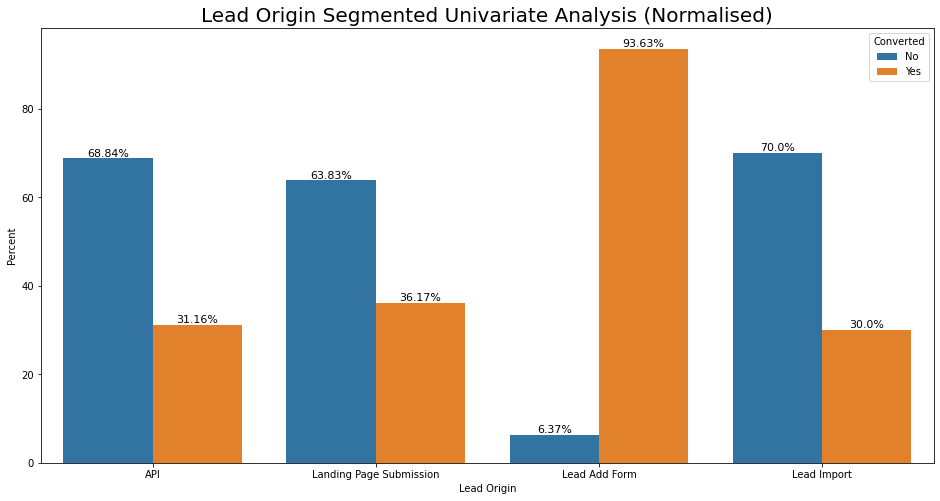

In [36]:
cat_seg_analysis('Lead Origin')
plt.show()

**Assessment:**  
- Landing Page Submission is highest Lead Origin.
- Lead Add Form has better conversion rate.

#### Feature: 'Lead Source'

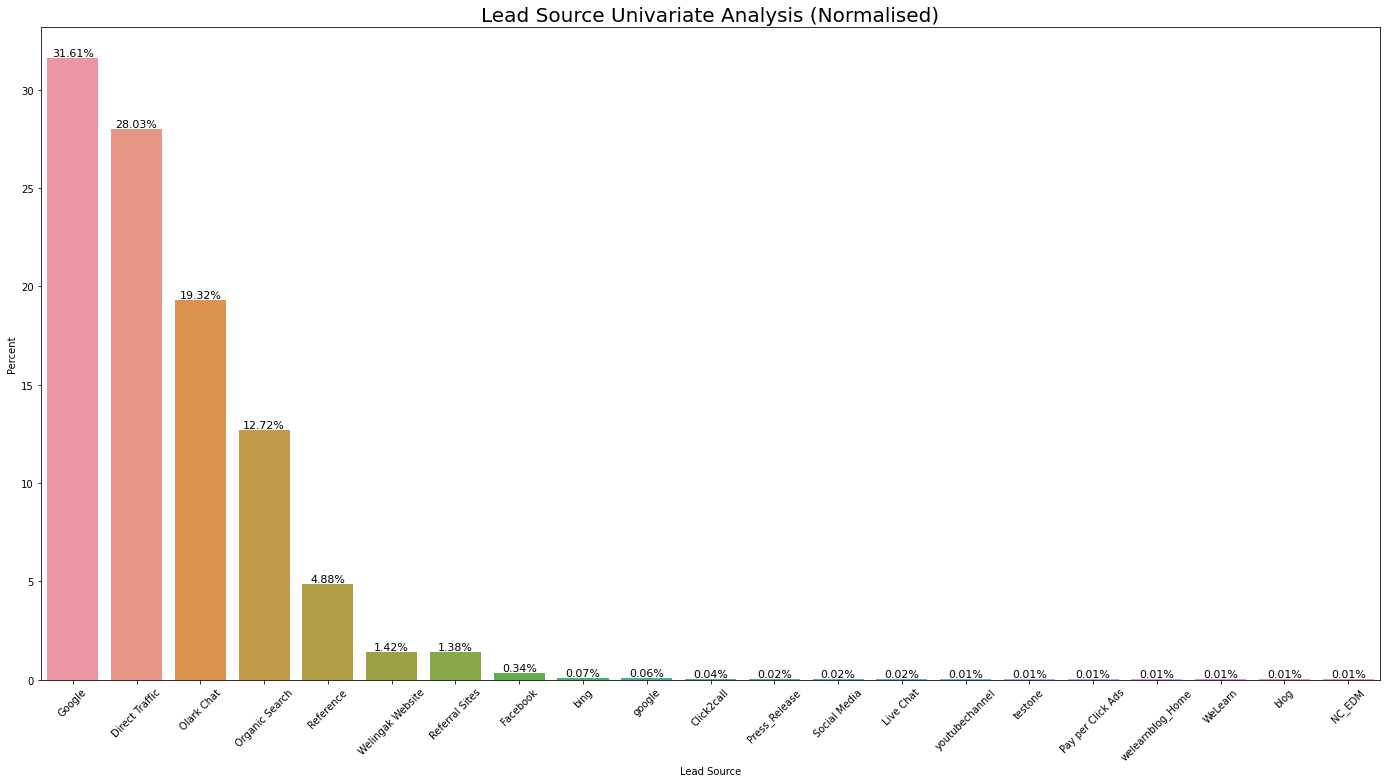

In [37]:
ax = cat_uni_analysis('Lead Source')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [38]:
# Fixing spelling issue in data
df['Lead Source'] = df['Lead Source'].replace({'google': 'Google'})

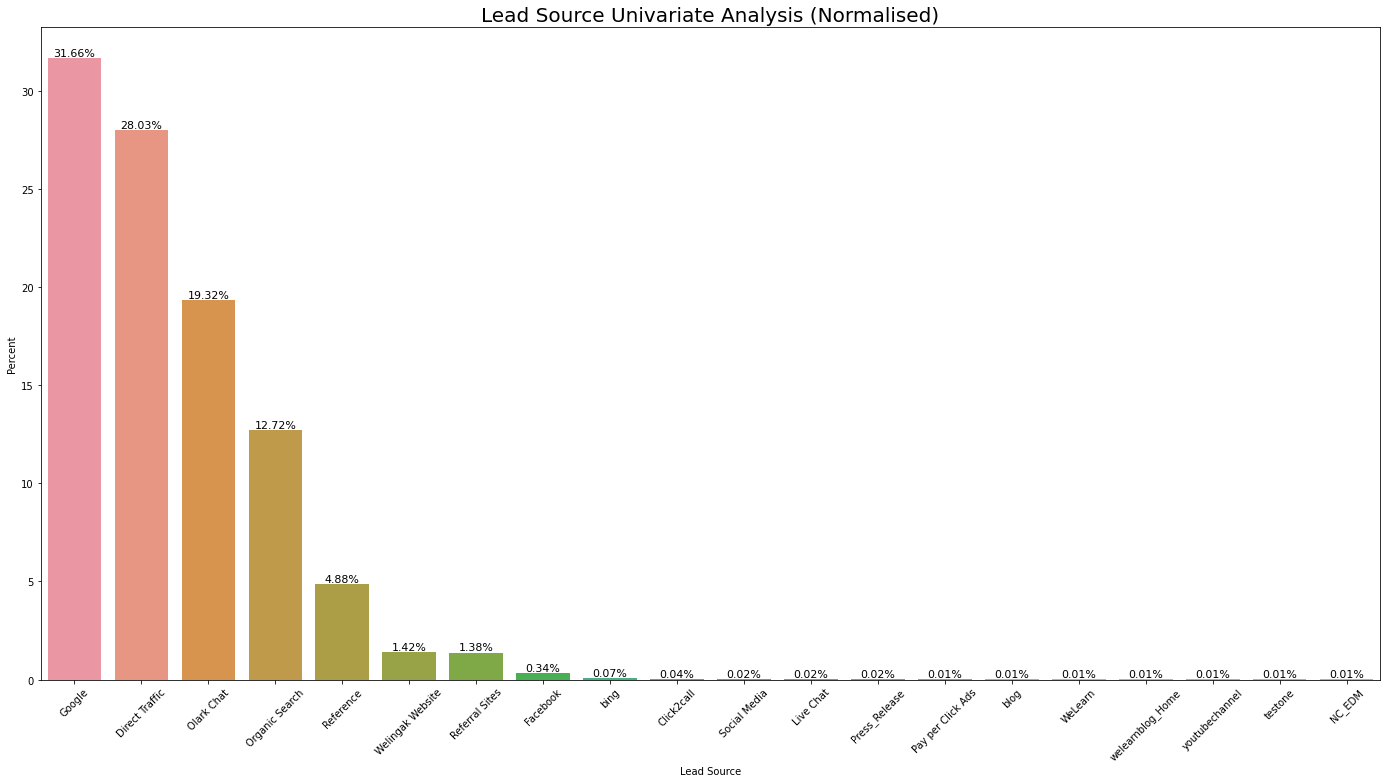

In [39]:
ax = cat_uni_analysis('Lead Source')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Binning low frequency categories into separate category for stability.

In [40]:
df['Lead Source'] = df['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'testone', 'NC_EDM'], 'Others')

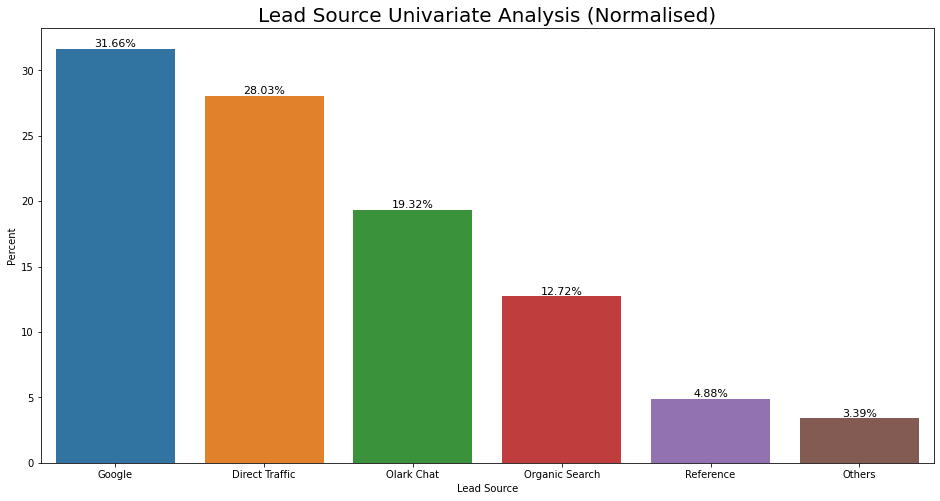

In [41]:
cat_uni_analysis('Lead Source')
plt.show()

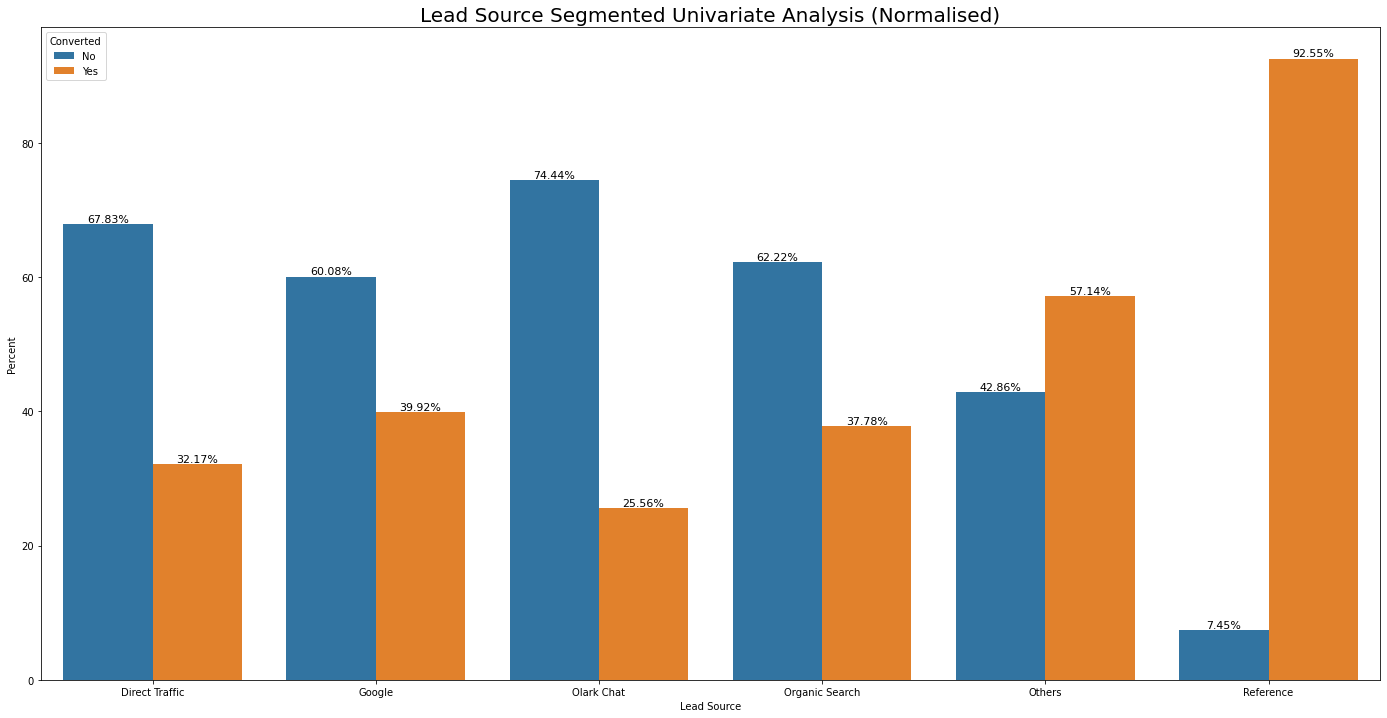

In [42]:
ax = cat_seg_analysis('Lead Source')
ax.figure.set_size_inches(24,12)
plt.show()

**Assessment:**  
- `Google` has highest number of Lead Source.
- `Reference` Lead Source has highest number of conversion rate.

#### Feature: 'Do Not Email'

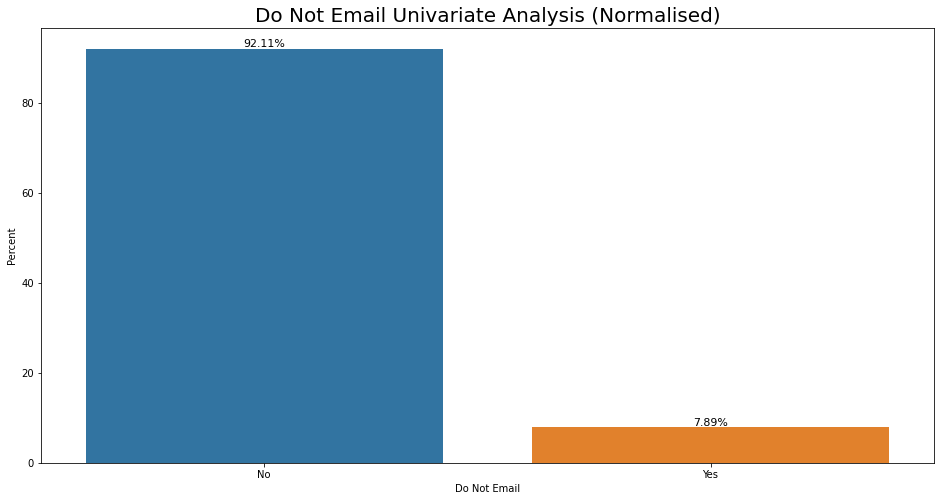

In [43]:
cat_uni_analysis('Do Not Email')
plt.show()

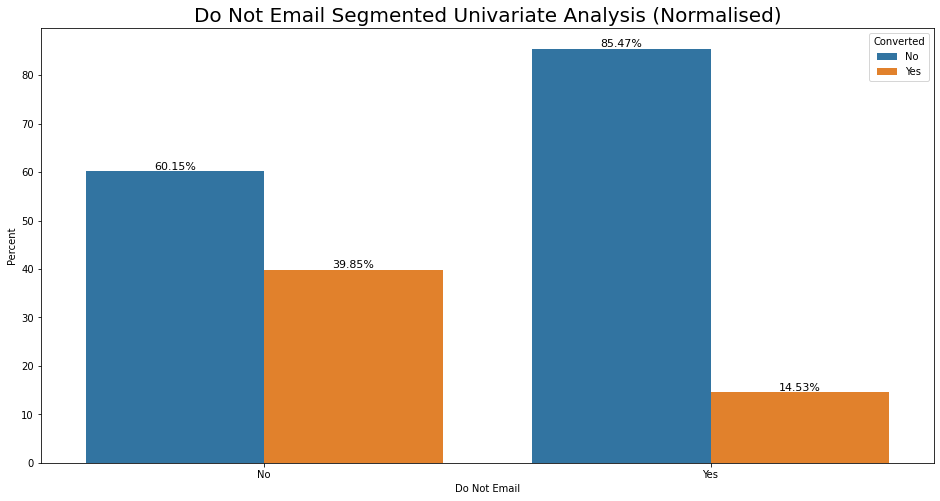

In [44]:
cat_seg_analysis('Do Not Email')
plt.show()

**Assessment:**  
- Most of the customers don't want to get disturbed by the email.
- The customers who don't want to get disturbed by email also converts better.

#### Feature: 'TotalVisits'

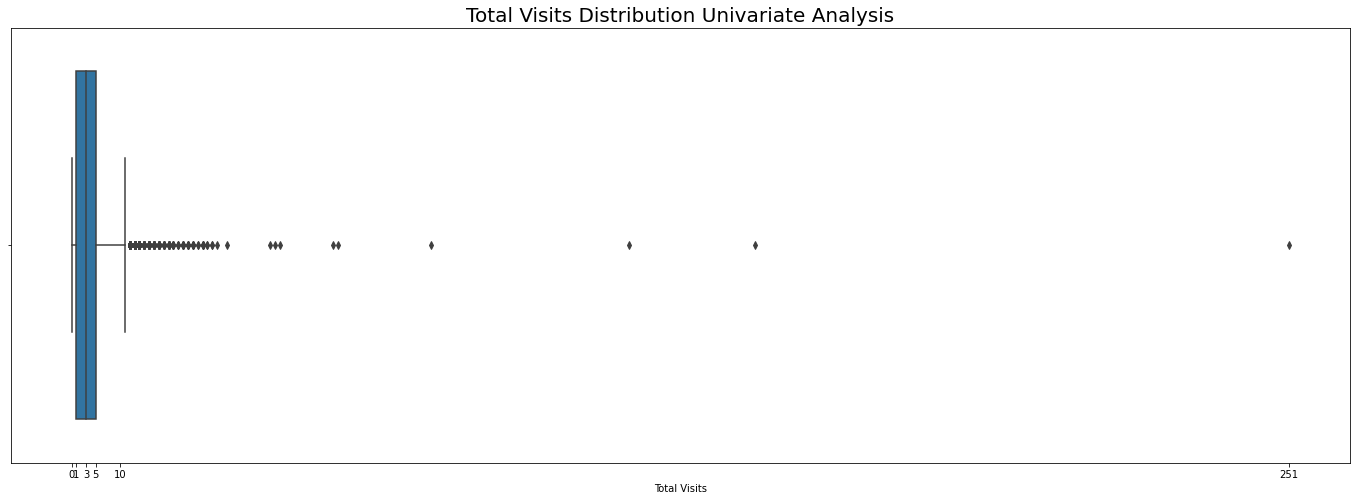

In [45]:
num_uni_box_analysis('TotalVisits', 'Total Visits')
plt.show()

Removing outliers..

In [46]:
df = df[df['TotalVisits'] < 50]

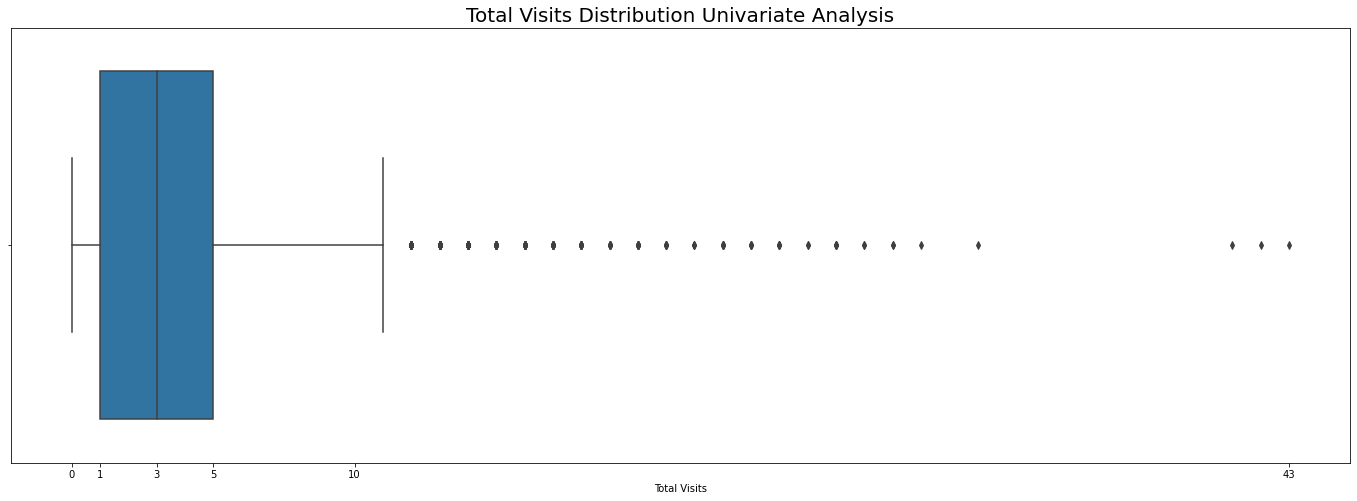

In [47]:
num_uni_box_analysis('TotalVisits', 'Total Visits')
plt.show()

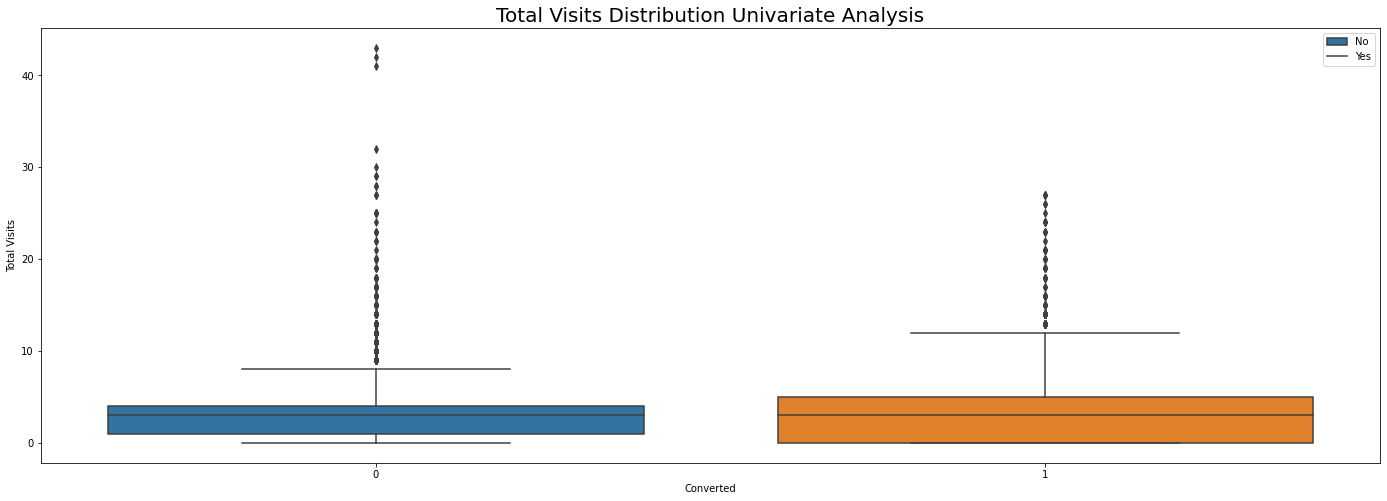

In [48]:
num_uni_box_seg_analysis('TotalVisits', 'Total Visits')
plt.show()

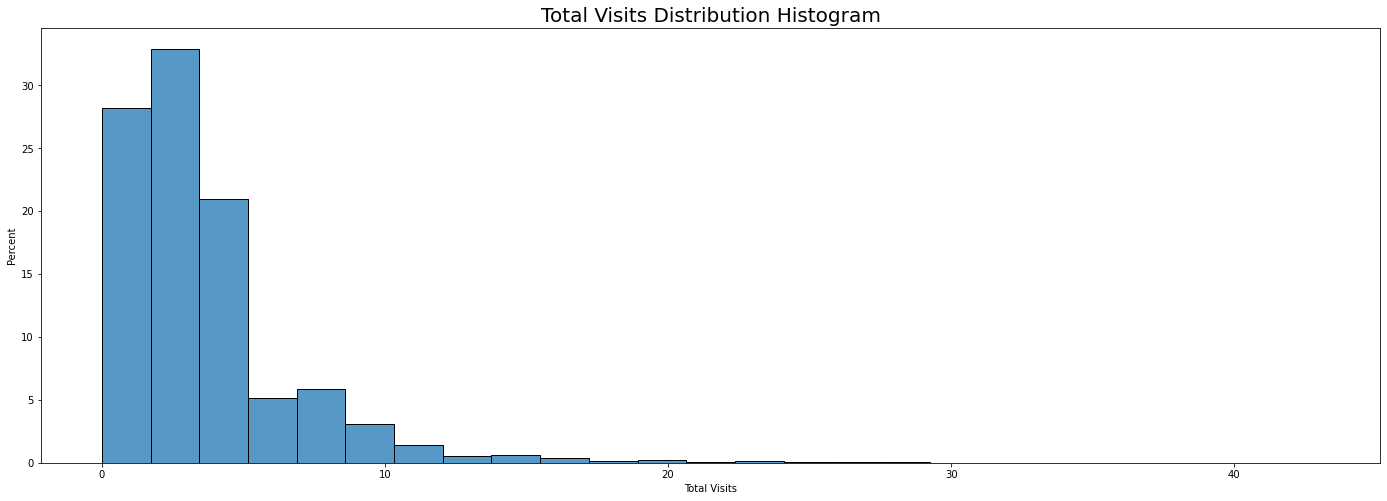

In [49]:
num_uni_hist_analysis('TotalVisits', 'Total Visits')
plt.show()

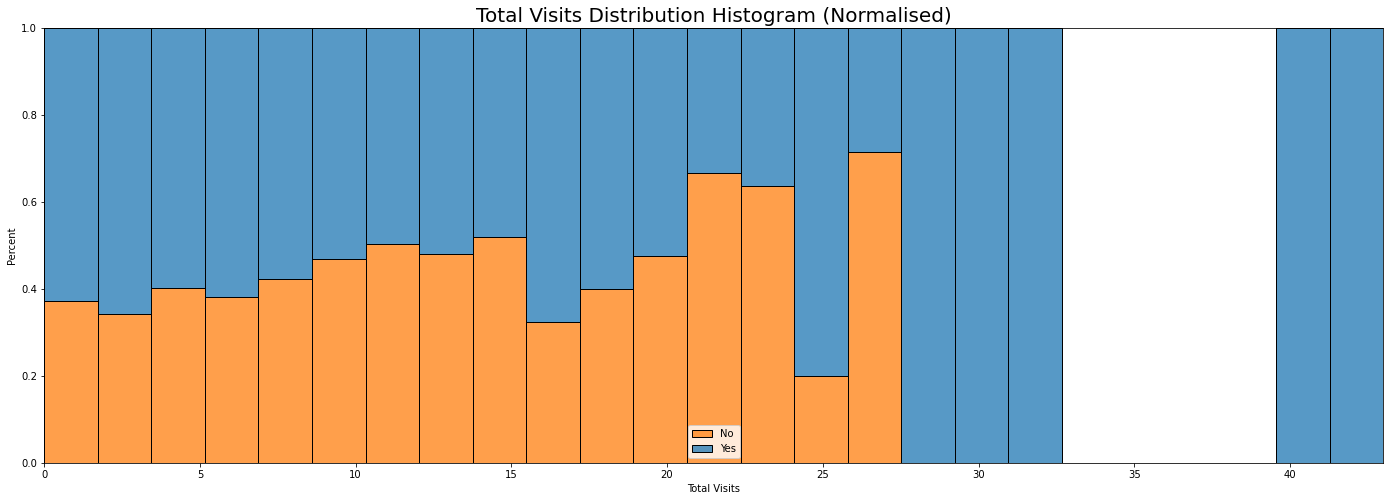

In [50]:
num_uni_hist_seg_analysis('TotalVisits', 'Total Visits')
plt.show()

**Assessment:**  
- `TotalVisits` doesn't say anything significant about conversion. Conversion is higher for outliers that doesn't paint real picture.

#### Feature: 'Total Time Spent on Website'

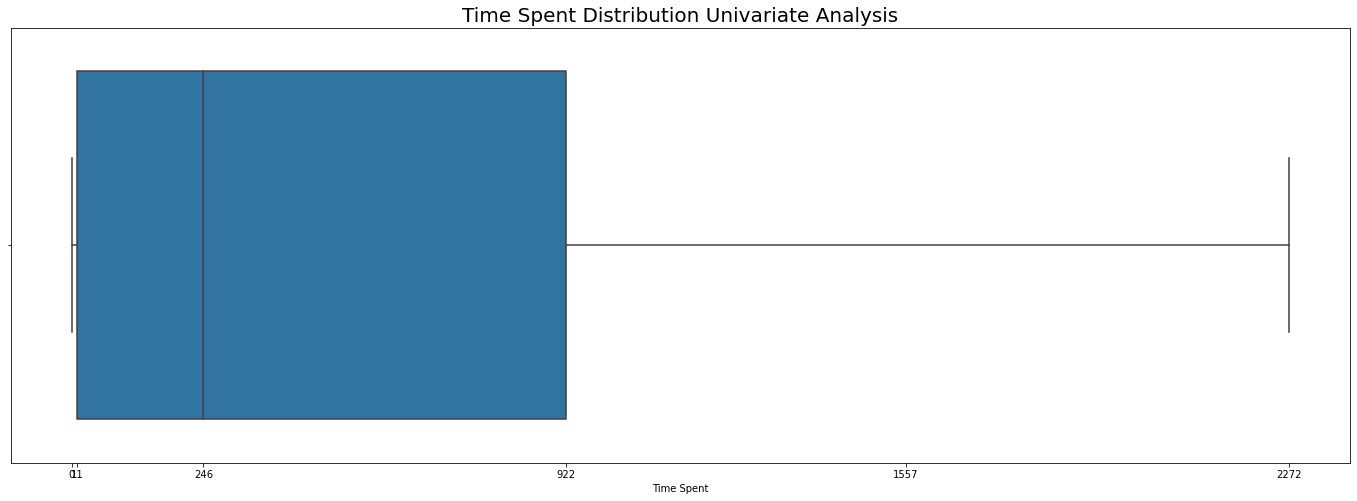

In [51]:
num_uni_box_analysis('Total Time Spent on Website', 'Time Spent')
plt.show()

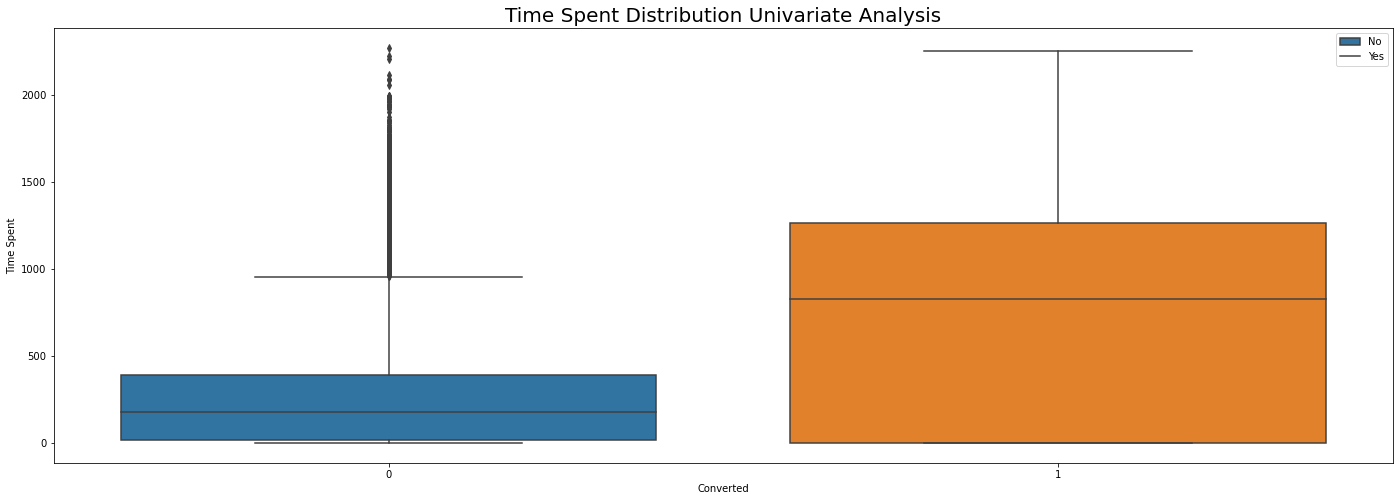

In [52]:
num_uni_box_seg_analysis('Total Time Spent on Website', 'Time Spent')
plt.show()

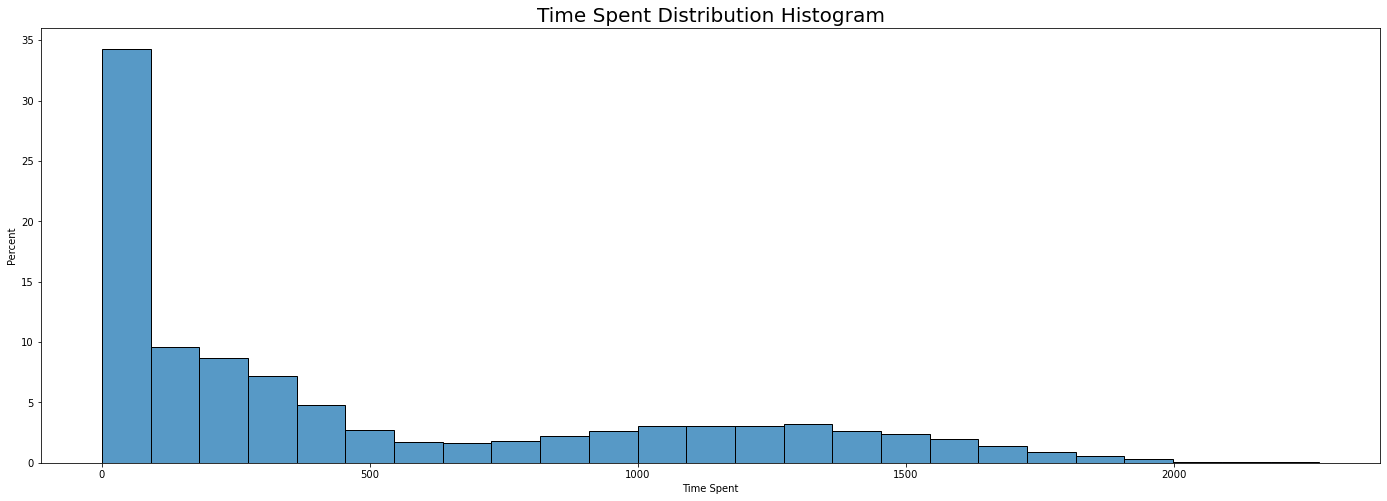

In [53]:
num_uni_hist_analysis('Total Time Spent on Website', 'Time Spent')
plt.show()

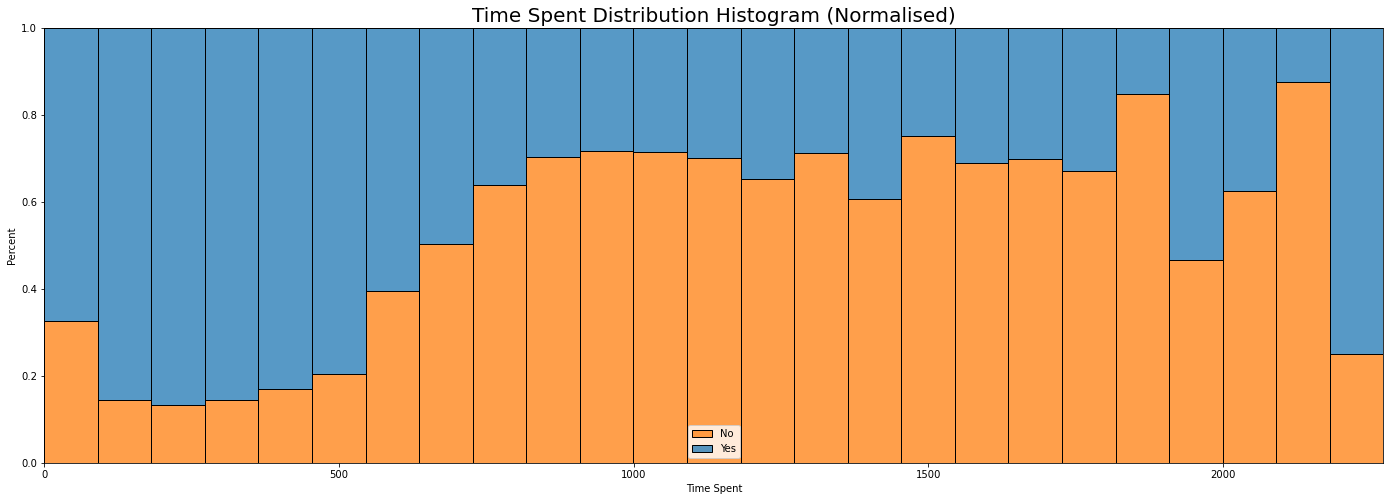

In [54]:
num_uni_hist_seg_analysis('Total Time Spent on Website', 'Time Spent')
plt.show()

**Assessment:**  
- Most customers spend less time on the website.
- Those customers who spend more time on the website convert more.

#### Feature: 'Page Views Per Visit'

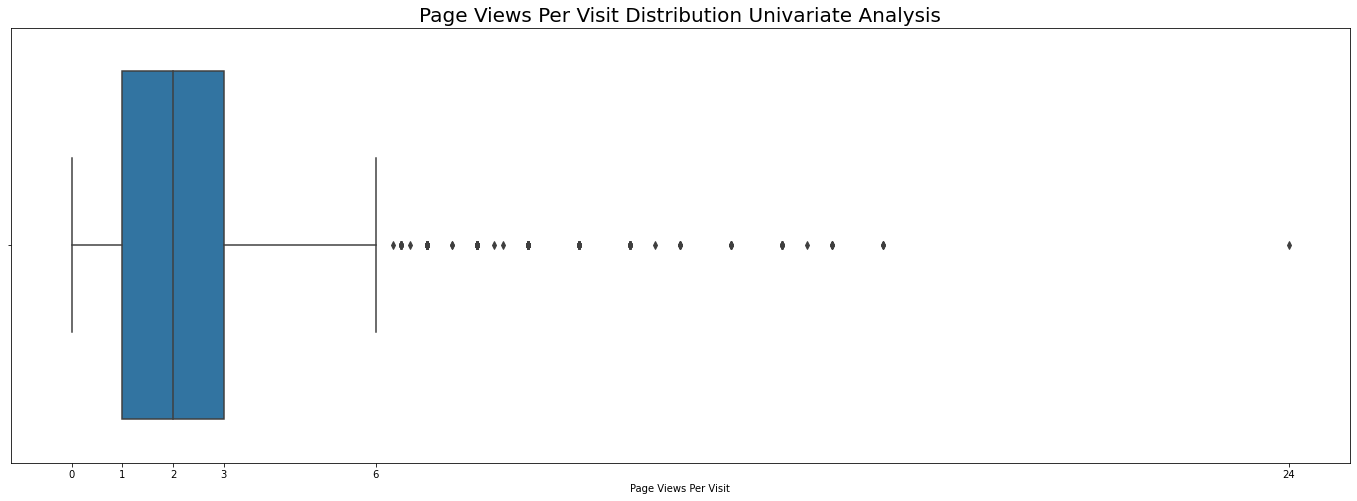

In [55]:
num_uni_box_analysis('Page Views Per Visit')
plt.show()

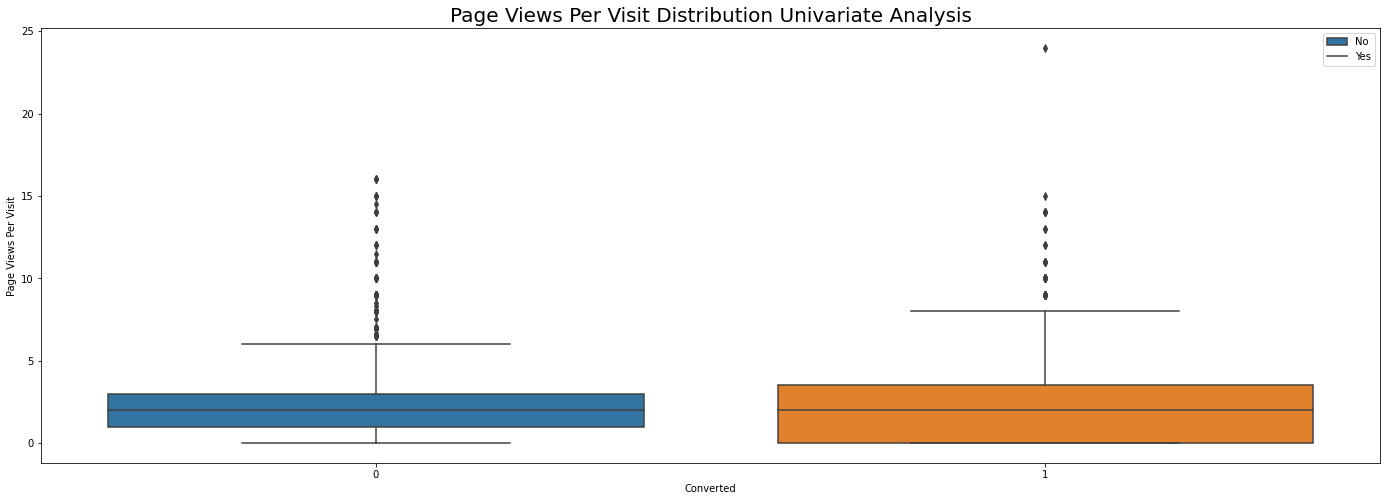

In [56]:
num_uni_box_seg_analysis('Page Views Per Visit')
plt.show()

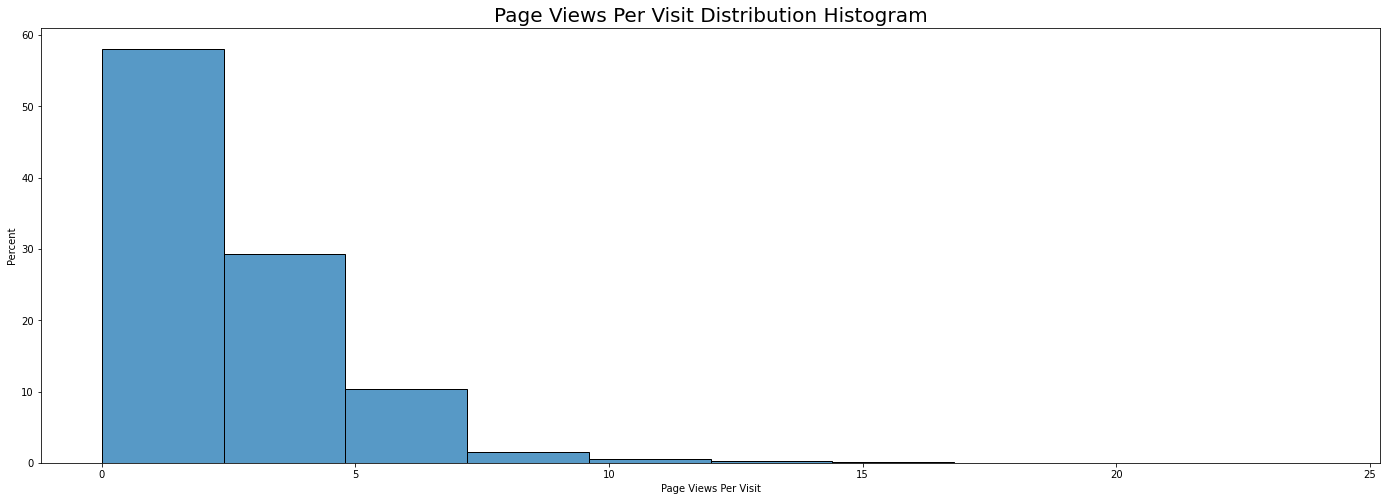

In [57]:
num_uni_hist_analysis('Page Views Per Visit', bins=10)
plt.show()

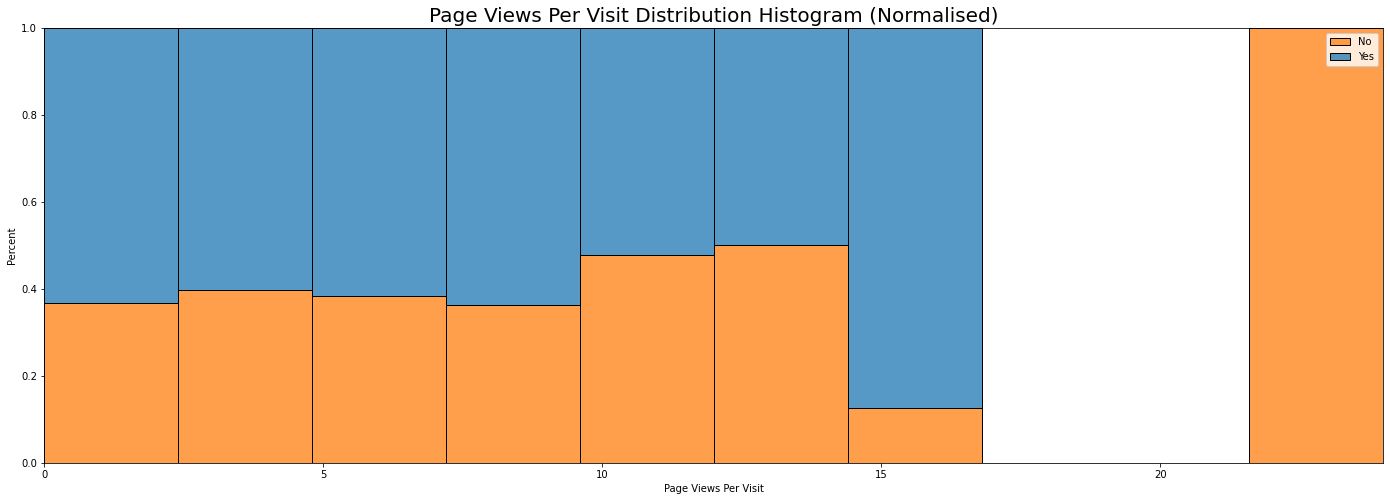

In [58]:
num_uni_hist_seg_analysis('Page Views Per Visit', bins=10)
plt.show()

**Assessment:**  
- `Page Views Per Visit` is less for most customers.
- `Page Views Per Visit` doesn't say anything significant about conversion.

#### Feature: 'Last Activity'

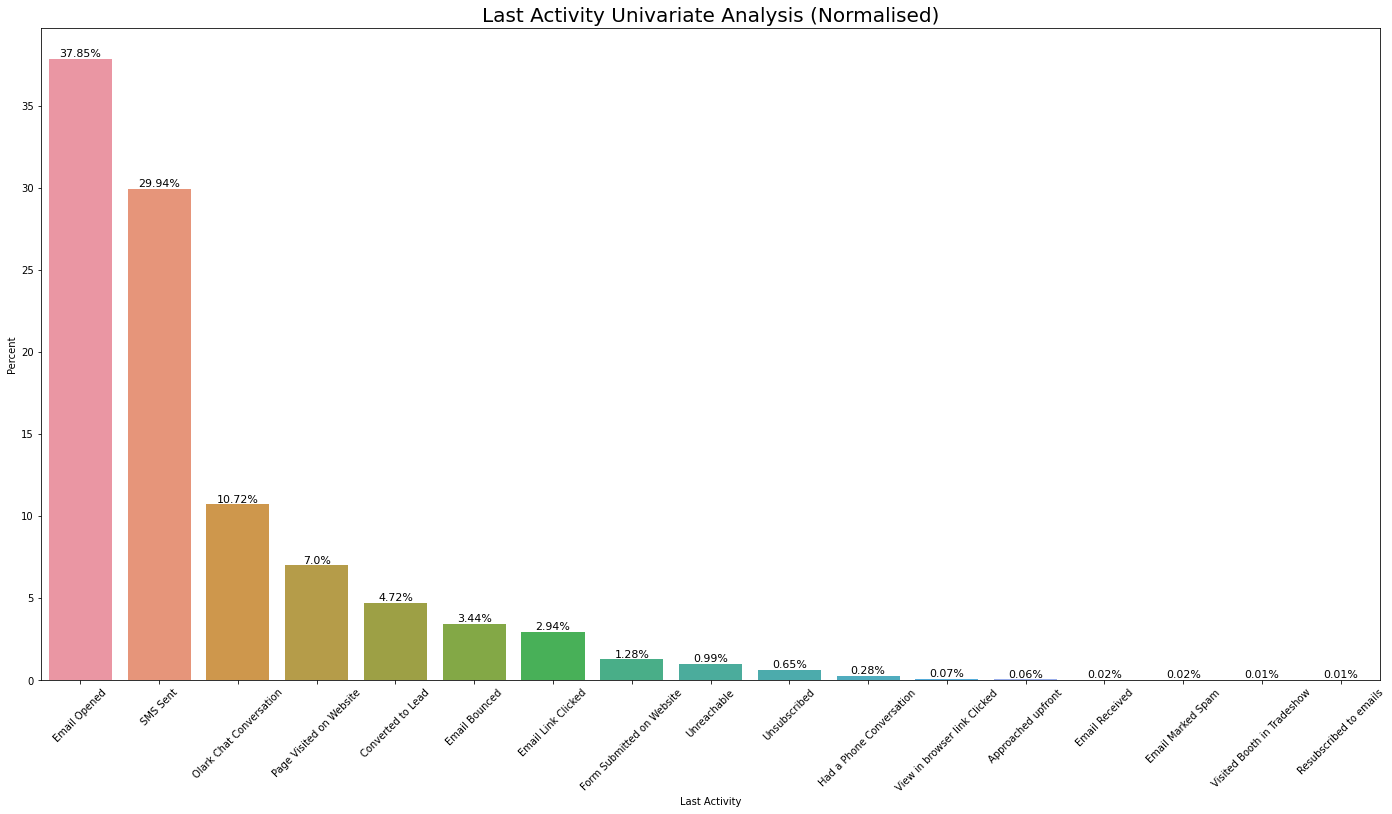

In [59]:
ax = cat_uni_analysis('Last Activity')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Binning low frequency categories into separate category for stability.

In [60]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Other')

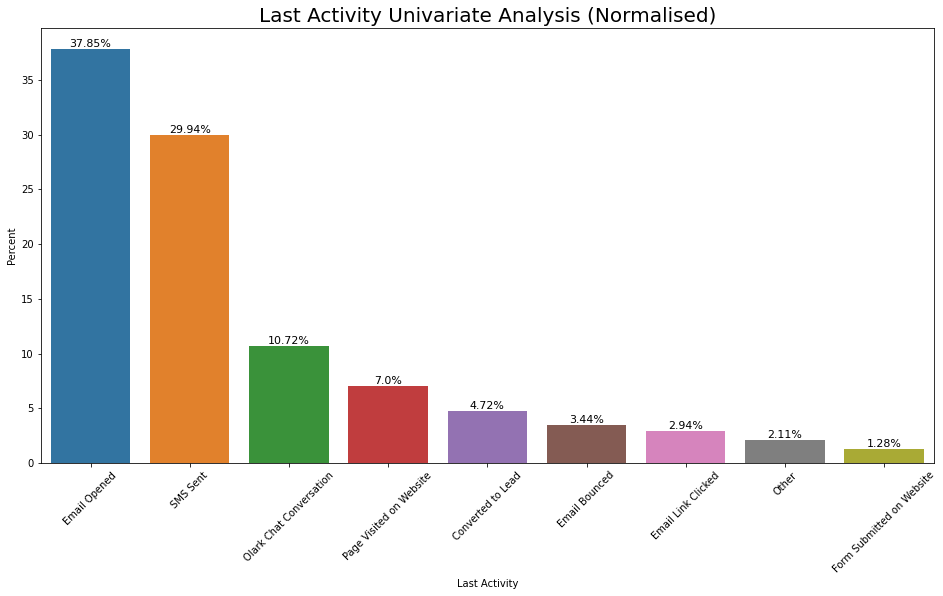

In [61]:
ax = cat_uni_analysis('Last Activity')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

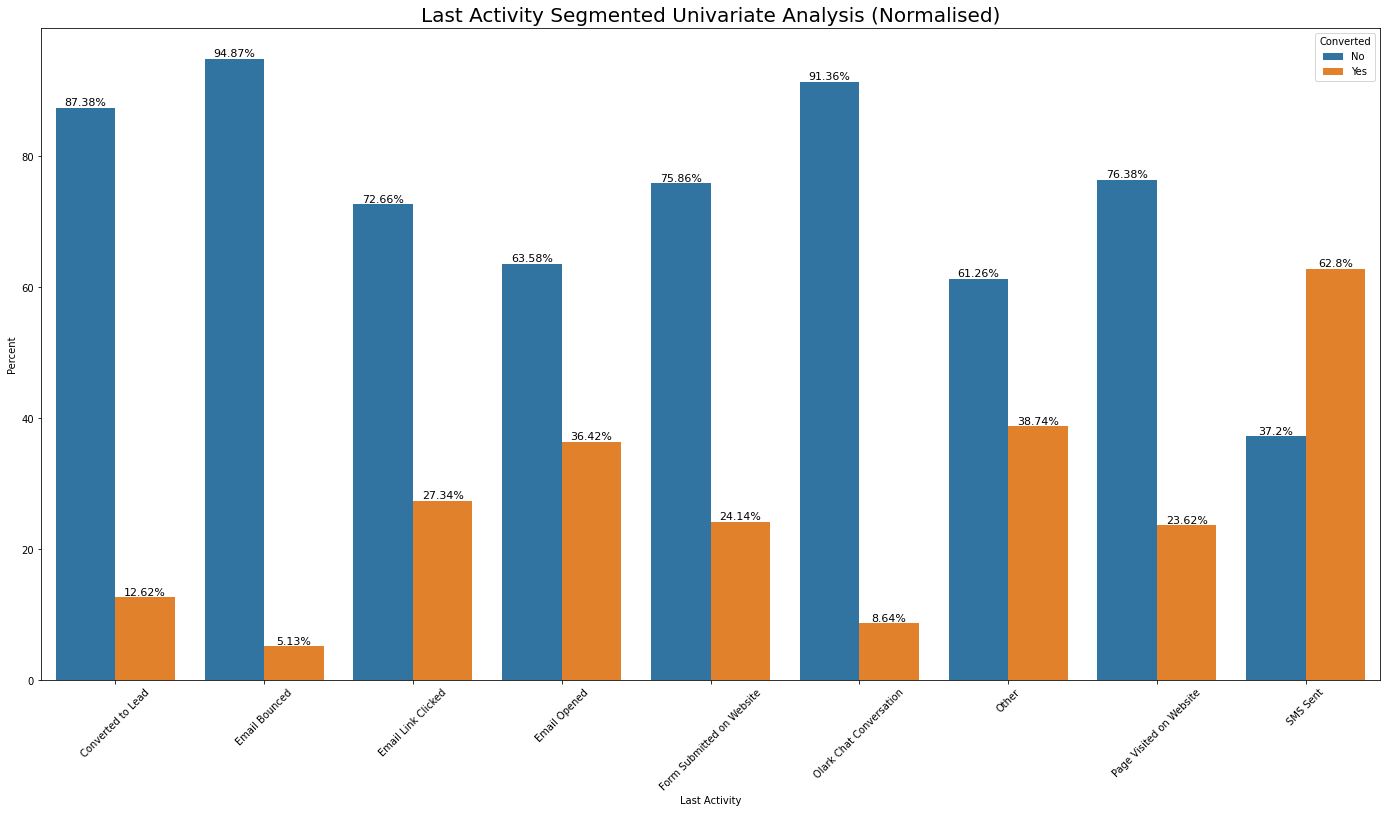

In [62]:
ax = cat_seg_analysis('Last Activity')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

**Assessment:**  
- If `Last Activity` is `SMS Sent`, conversion is highest.

#### Feature: 'Country'

In [63]:
df['Country'].value_counts(normalize=True) * 100

India                   96.835024
United States            0.760918
United Arab Emirates     0.584473
Singapore                0.264667
Saudi Arabia             0.231584
United Kingdom           0.165417
Australia                0.143361
Qatar                    0.110278
Hong Kong                0.077195
Bahrain                  0.077195
Oman                     0.066167
France                   0.066167
unknown                  0.055139
South Africa             0.044111
Nigeria                  0.044111
Germany                  0.044111
Kuwait                   0.044111
Canada                   0.044111
Sweden                   0.033083
China                    0.022056
Asia/Pacific Region      0.022056
Uganda                   0.022056
Bangladesh               0.022056
Italy                    0.022056
Belgium                  0.022056
Netherlands              0.022056
Ghana                    0.022056
Philippines              0.022056
Russia                   0.011028
Switzerland   

Binning all non-Indian categories into separate feature for stability.

In [64]:
df['Country'] = df['Country'].apply(lambda x: 'Others' if x != 'India' else 'India')

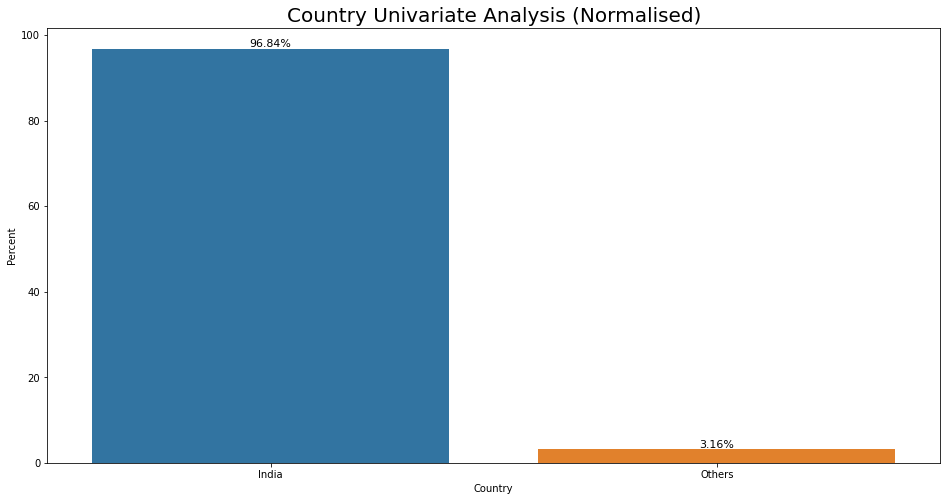

In [65]:
cat_uni_analysis('Country')
plt.show()

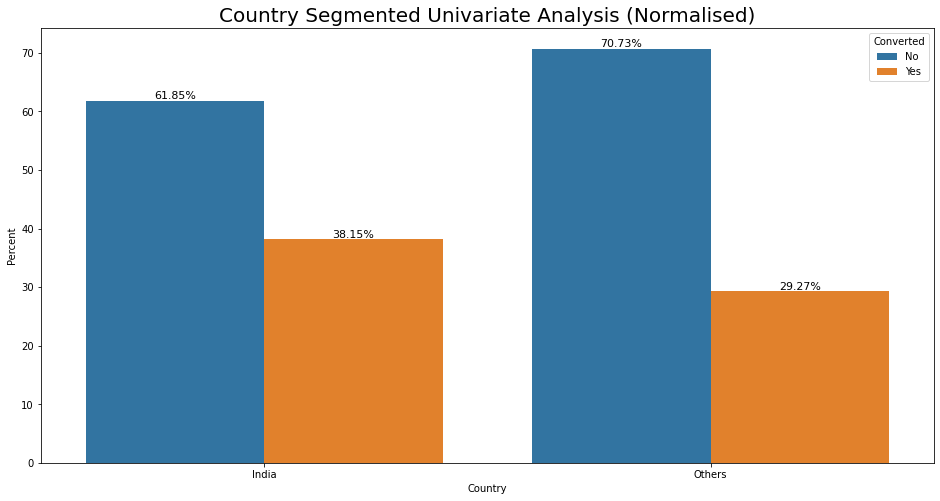

In [66]:
cat_seg_analysis('Country')
plt.show()

**Assessment:**  
- Most of the customers belong from India.
- Conversion rate of Indians is little bit better.

#### Feature: 'Specialization'

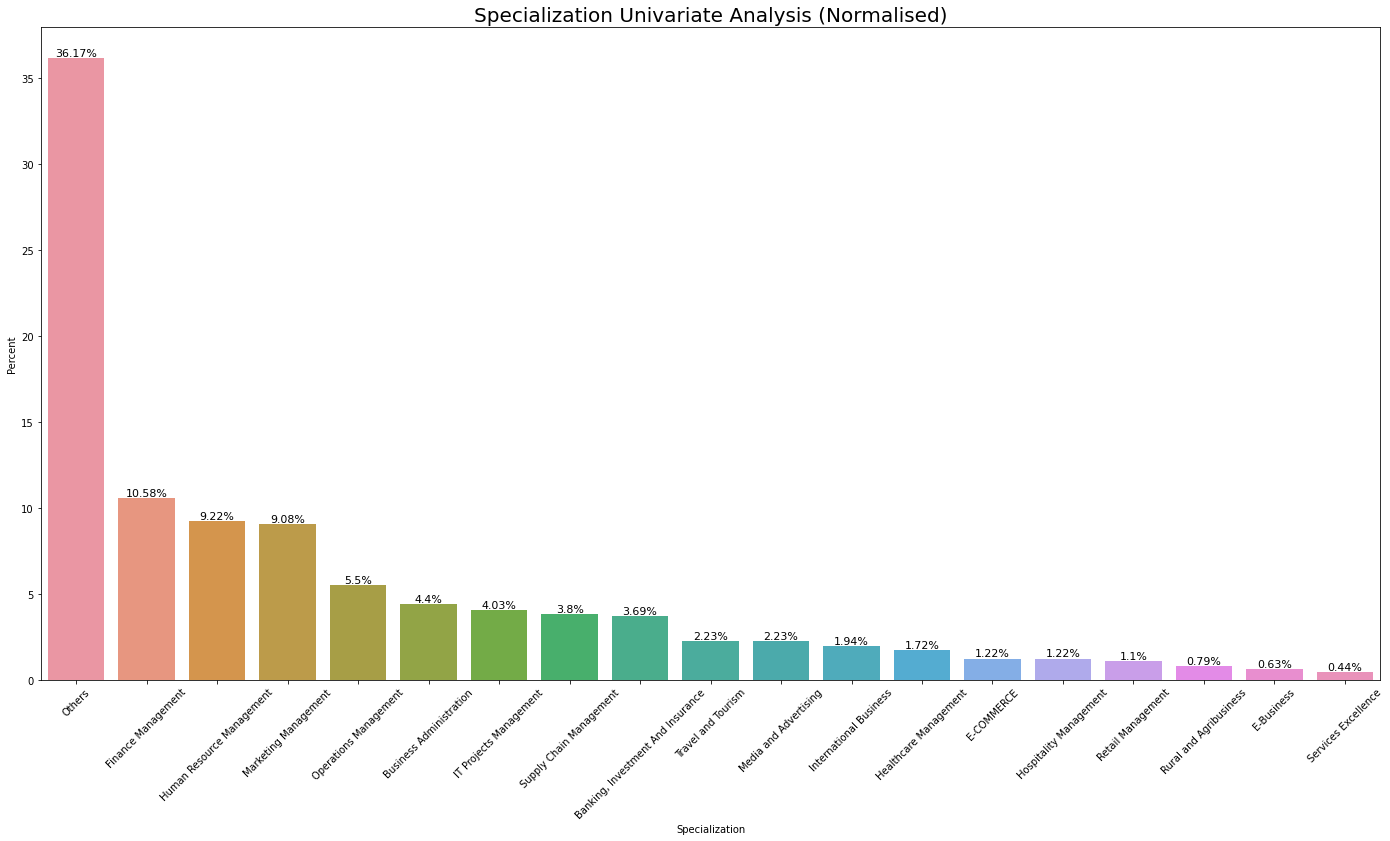

In [67]:
ax = cat_uni_analysis('Specialization')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

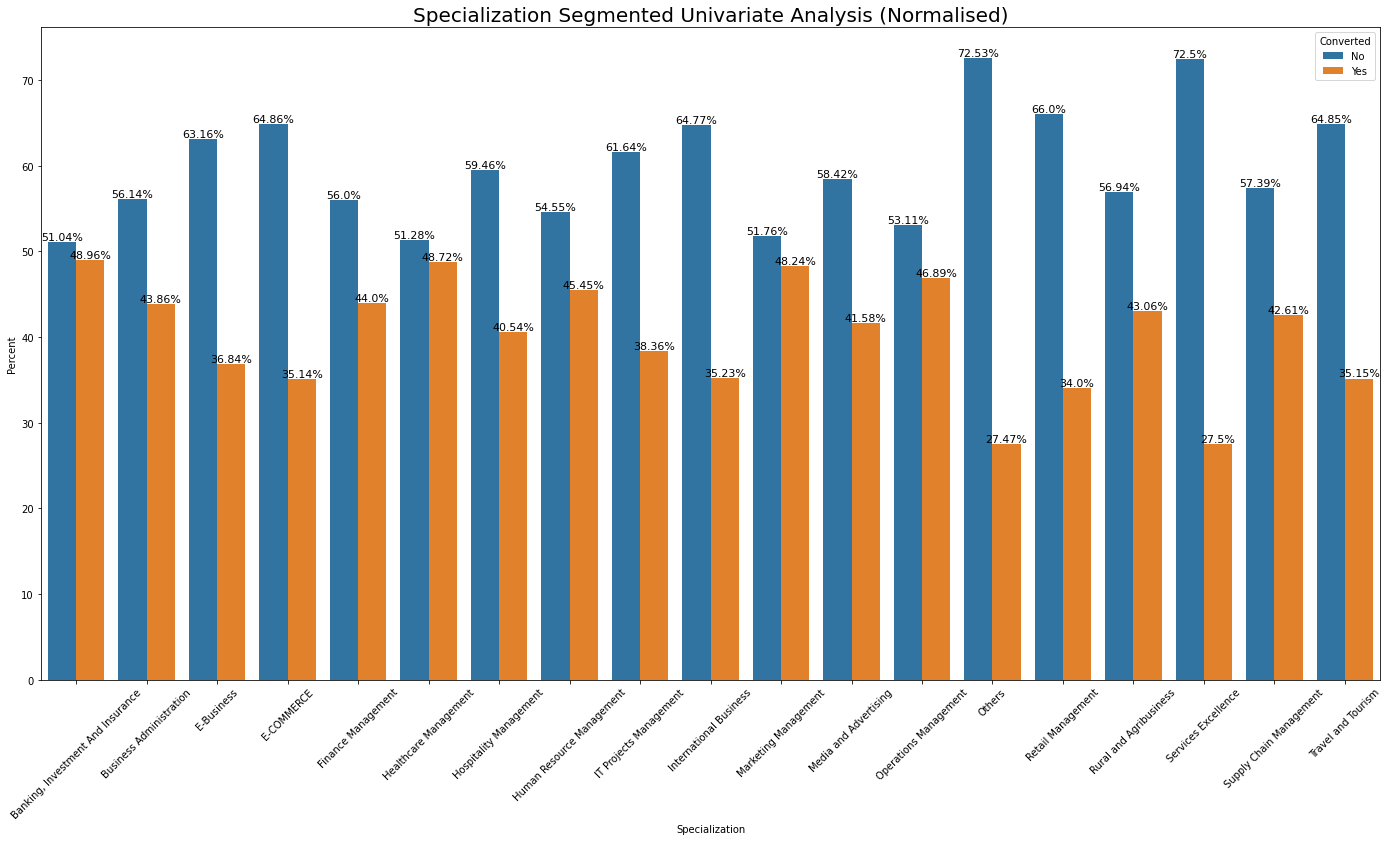

In [68]:
ax = cat_seg_analysis('Specialization')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

**Assessment:**  
- Customers in Banking, Investment And Insurance specialization convert most closely followed by customers in Healthcare Management & Marketing Management.

#### Feature: 'What is your current occupation'

Renaming the feature name to `Occupation`.

In [69]:
df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

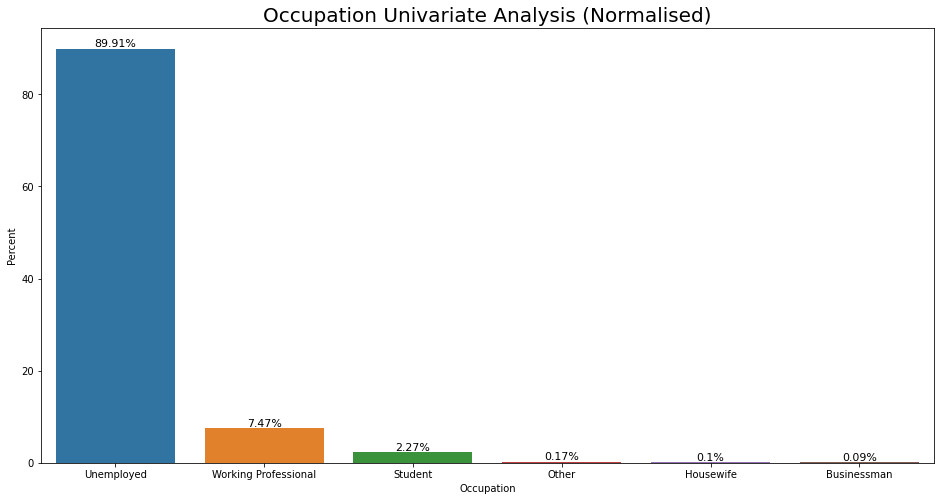

In [70]:
cat_uni_analysis('Occupation')
plt.show()

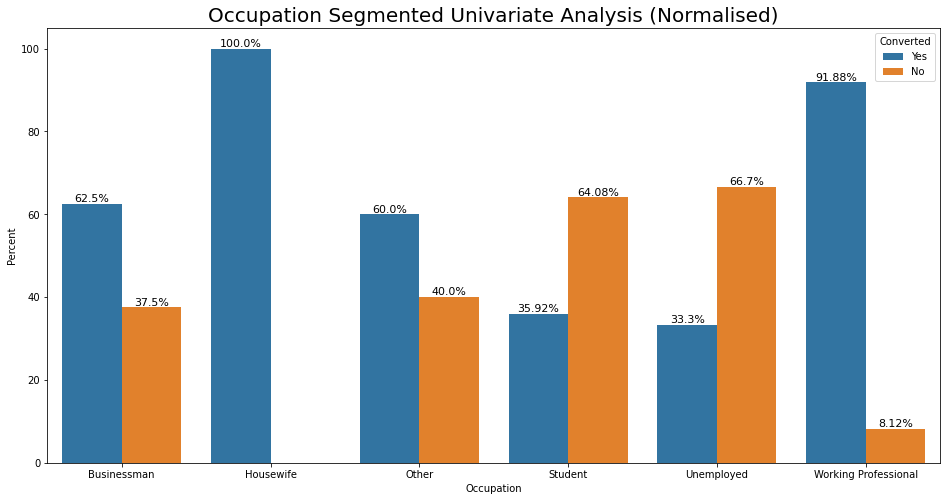

In [71]:
cat_seg_analysis('Occupation')
plt.show()

**Assessment:**  
- Most of the customers are unemployed.
- `Unemployed` & `Student` both convert most.

#### Feature: 'Tags'

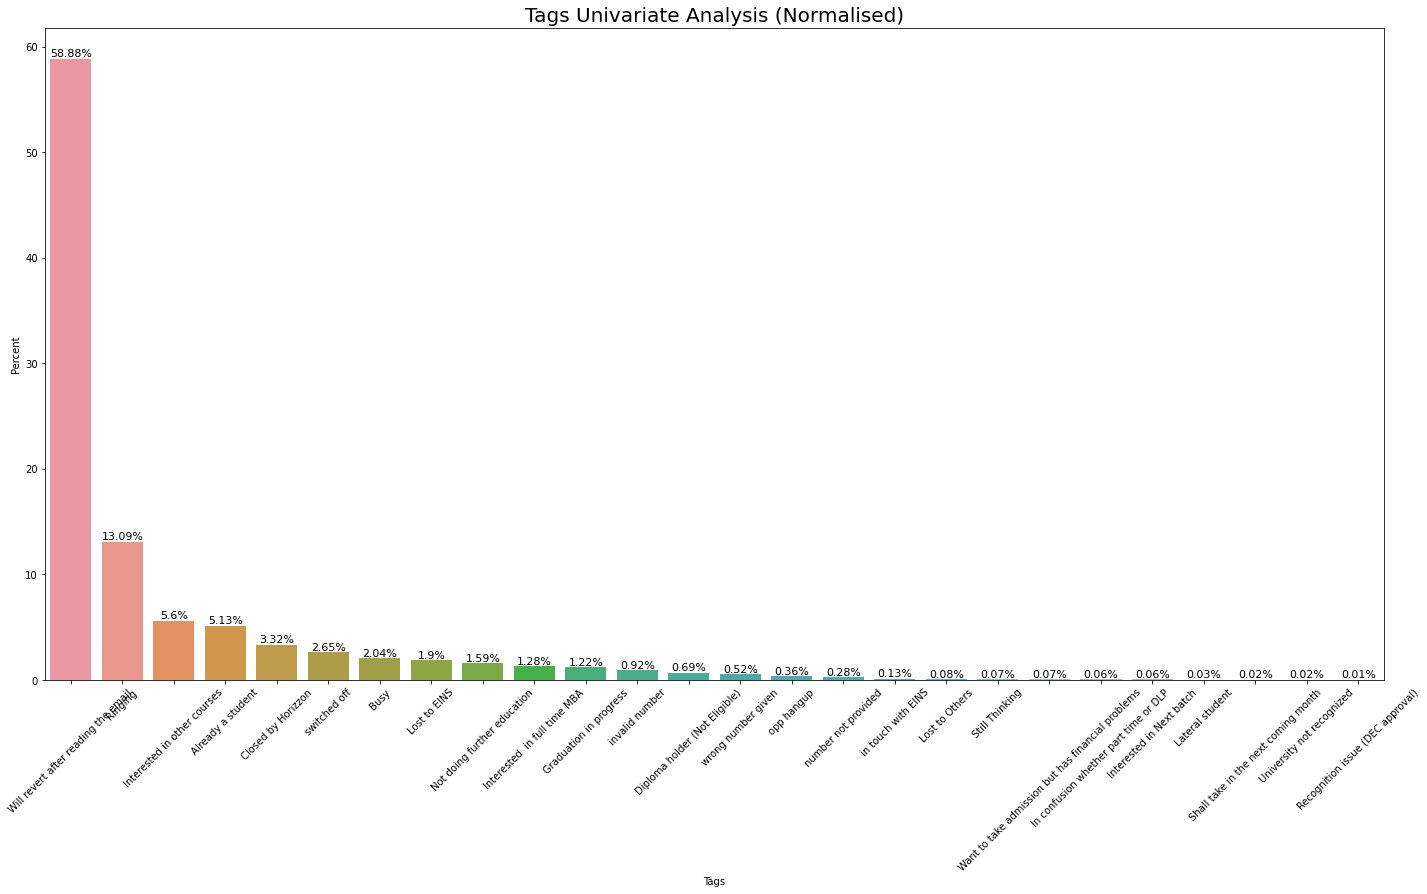

In [72]:
ax = cat_uni_analysis('Tags')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

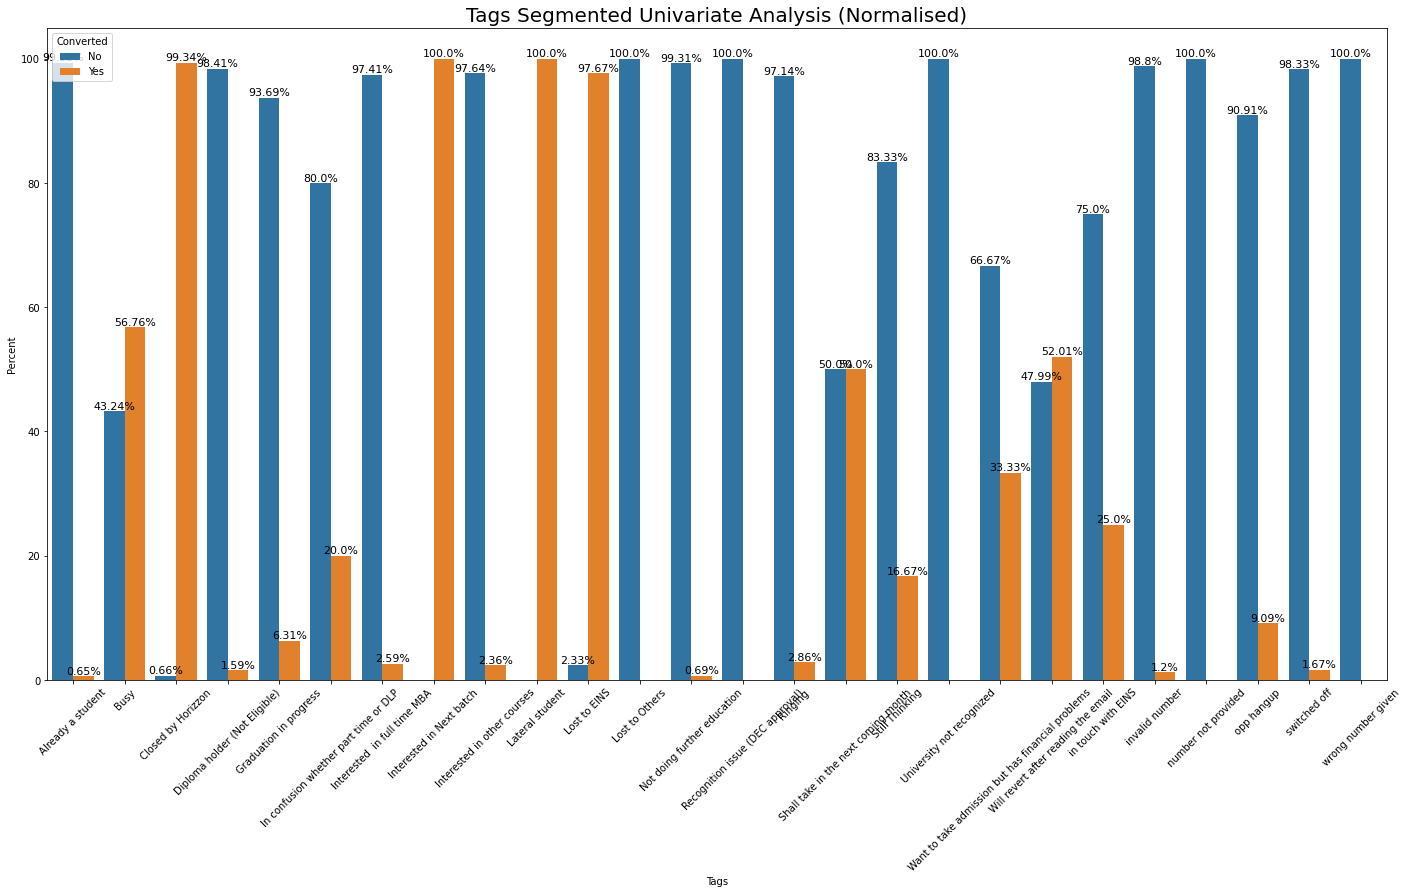

In [73]:
ax = cat_seg_analysis('Tags')
ax.figure.set_size_inches(24,12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

#### Feature: 'City'

In [74]:
df['City'].value_counts(normalize=True) * 100

Mumbai                         73.753860
Thane & Outskirts               8.204676
Other Cities                    8.149537
Other Cities of Maharashtra     4.918394
Other Metro Cities              4.157477
Tier II Cities                  0.816056
Name: City, dtype: float64

In [75]:
df[(df['Country'] != 'India') & (df['City'] == 'Mumbai')][['Country', 'City']].head()

,Country,City
87,Others,Mumbai
103,Others,Mumbai
243,Others,Mumbai
425,Others,Mumbai
445,Others,Mumbai


There are issues with data. The `Others` country shouldn't have `Mumbai` city. Fixing.

In [76]:
df['City'] = df.apply(lambda x: 'Other Cities' if ((x['Country'] == 'Others') & (x['City'] in ['Mumbai', 'Thane & Outskirts', 'Other Cities of Maharashtra'])) else x['City'], axis=1)

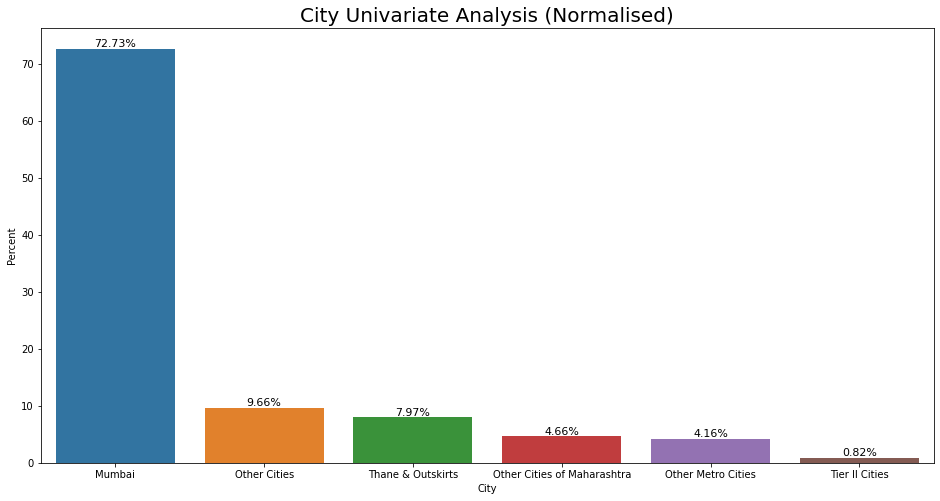

In [77]:
cat_uni_analysis('City')
plt.show()

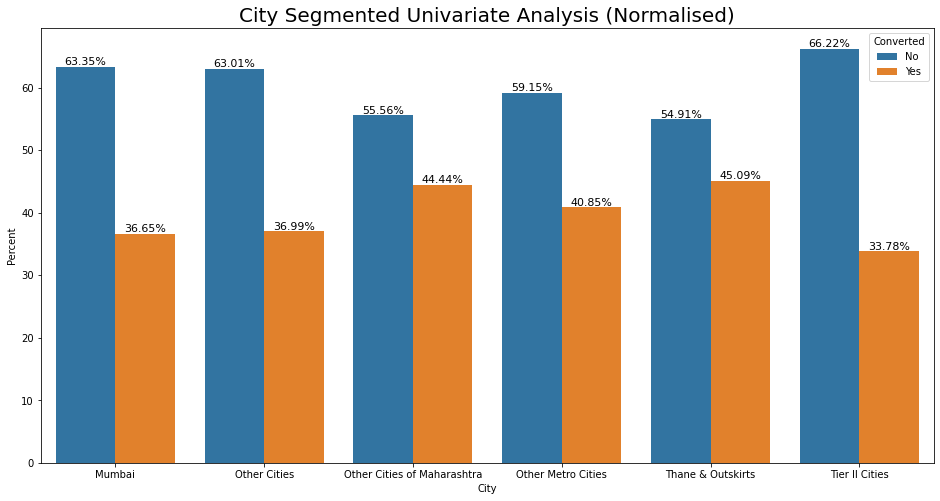

In [78]:
cat_seg_analysis('City')
plt.show()

**Assessment:**  
- Most of the customers are from `Mumbai`.
- Customers from `Thane & Outskirts` and `Other Cities of Maharashtra` convert most.

#### Feature: 'A free copy of Mastering The Interview'

Renaming the feature name to `Gift`.

In [79]:
df.rename(columns={'A free copy of Mastering The Interview': 'Gift'}, inplace=True)

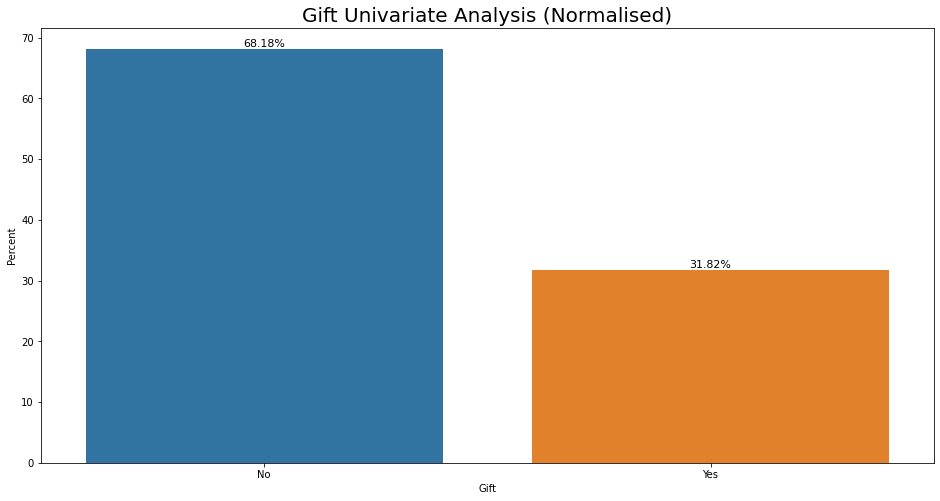

In [80]:
cat_uni_analysis('Gift')
plt.show()

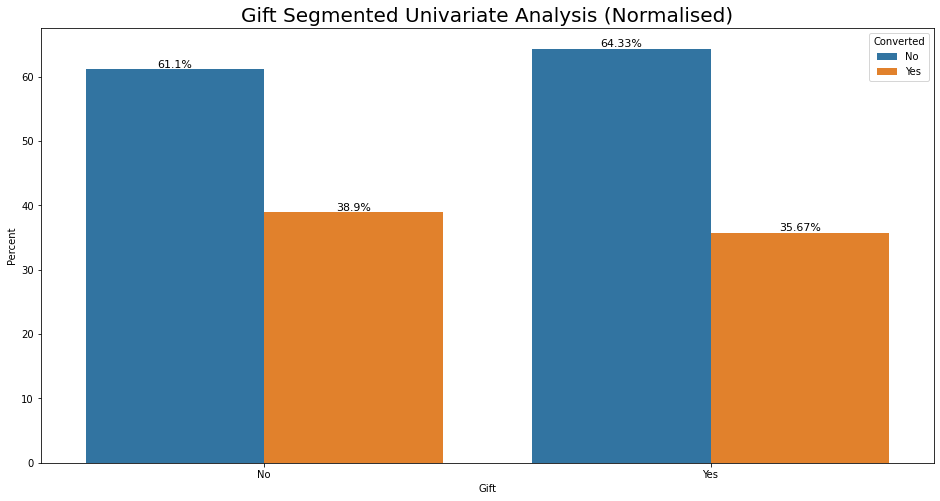

In [81]:
cat_seg_analysis('Gift')
plt.show()

**Assessment:**  
- Most customers don't want free copy of 'Mastering the Interview'.
- This choice doesn't significantly affect conversion rate.

### Bivariate Analysis

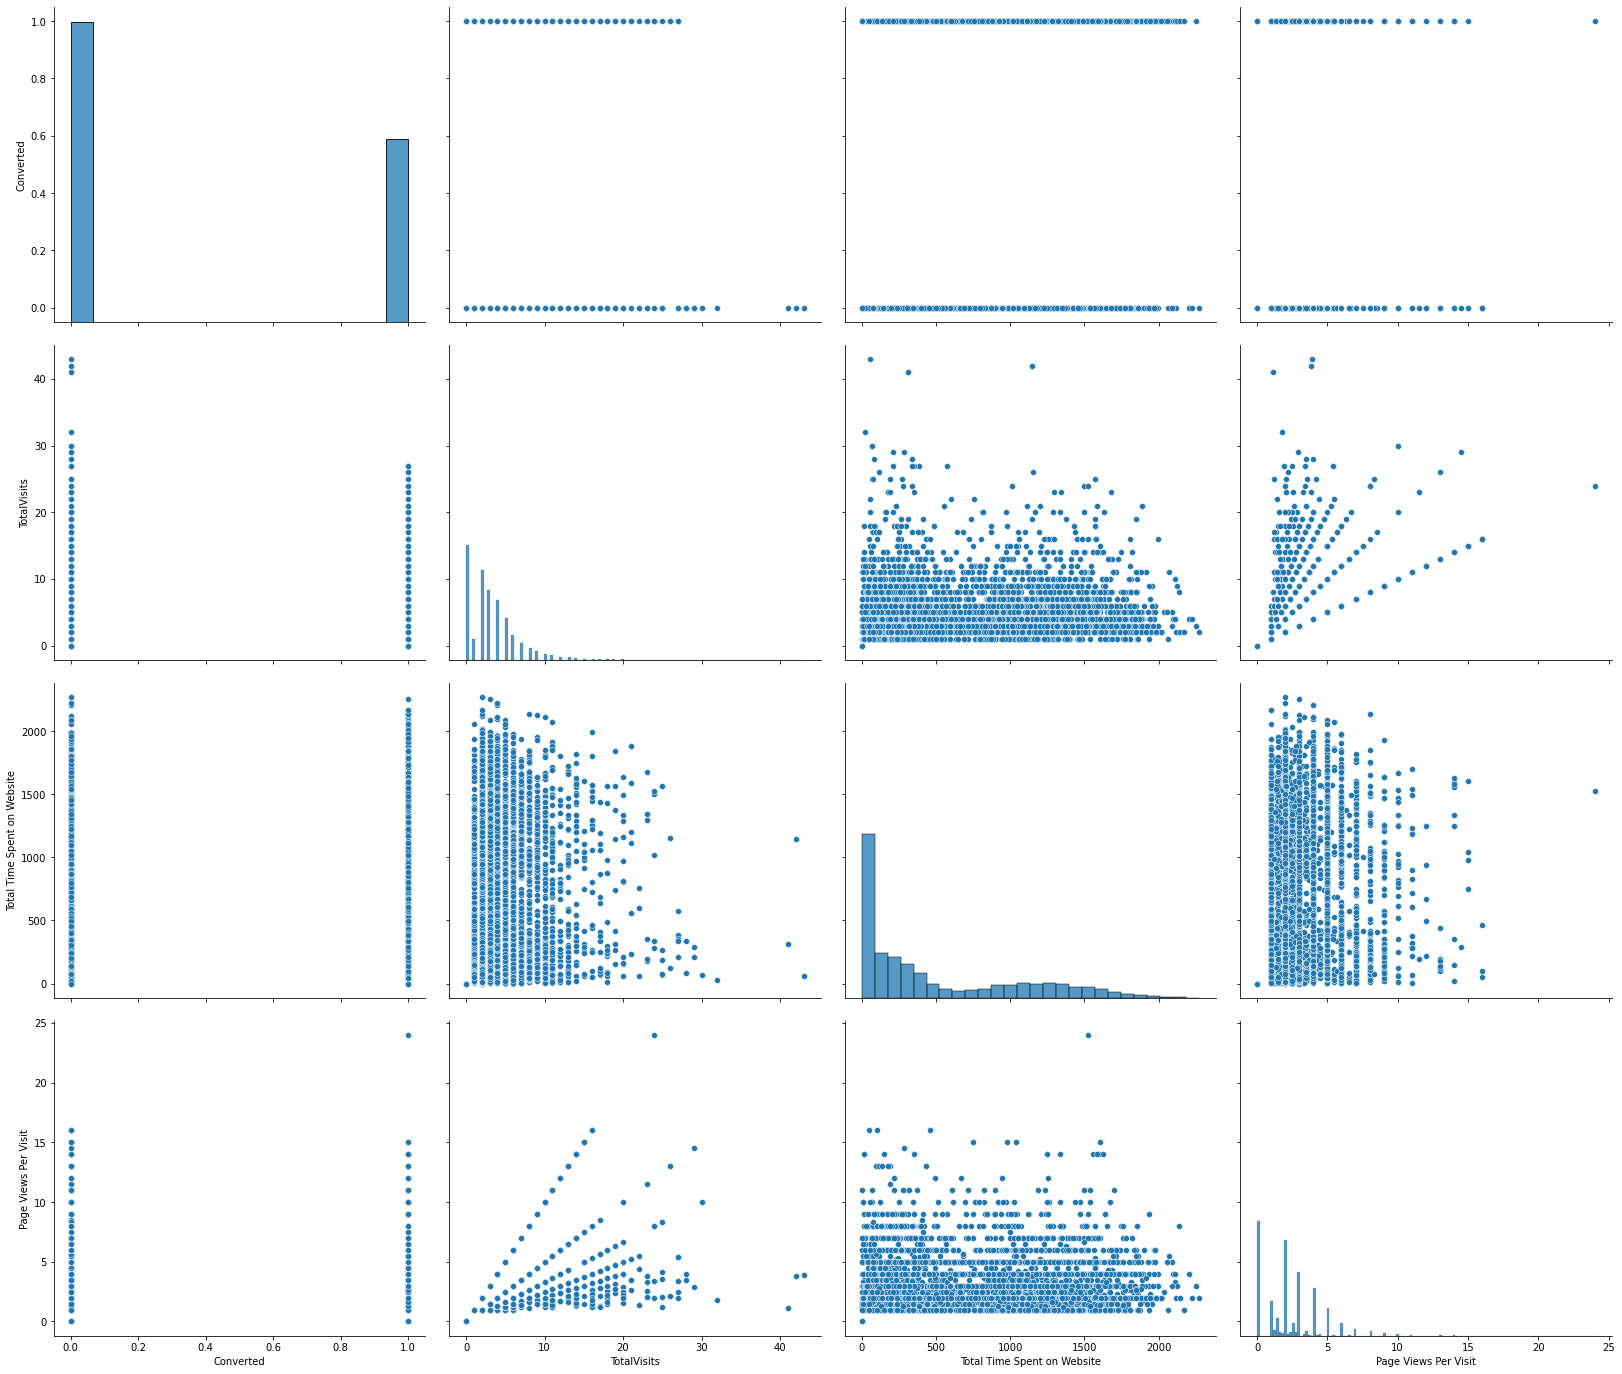

In [82]:
ax = sns.pairplot(df)
ax.figure.set_size_inches(24,20)

#### Correlation

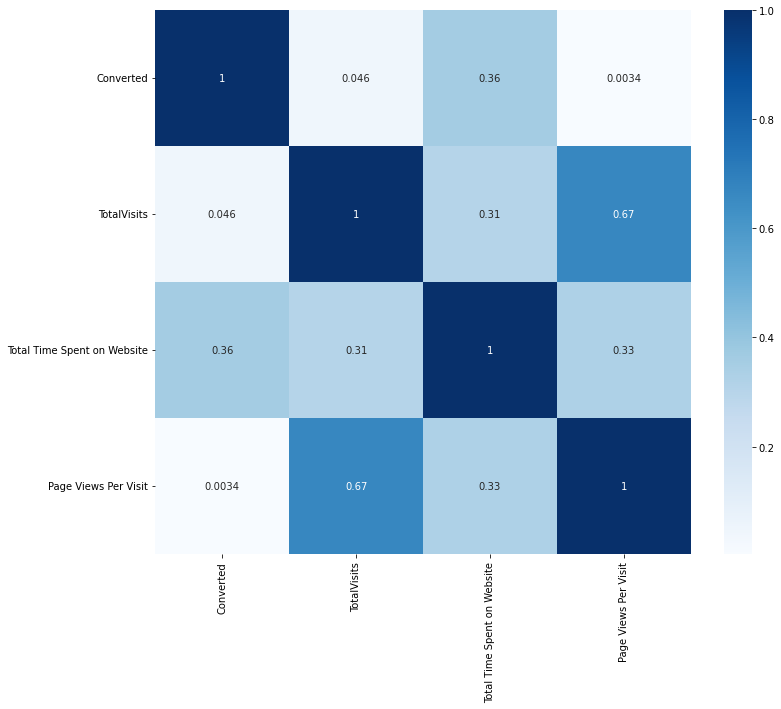

In [83]:
# Heatmap
ax = sns.heatmap(df.corr(), cmap='Blues', annot=True)
ax.figure.set_size_inches(12,10)
plt.show()

**Assessment:**  
- `Converted` is moderately correlated with `Total Time Spent on Website`.

## Data Preparation

### Dummy Variables Creation

In [84]:
cat_vars = ['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Country', 'Specialization', 'Occupation', 'Tags', 'City', 'Gift']
cat_dum = pd.get_dummies(df[cat_vars], drop_first=True)
df.drop(columns=cat_vars, inplace=True)
df = pd.concat([df, cat_dum], axis=1)
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Country_Others', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specia

In [85]:
df.shape

(9068, 76)

### Train-Test Split

In [86]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [87]:
df_train.shape

(6347, 76)

In [88]:
df_test.shape

(2721, 76)

### Rescaling Training Set